In [1]:
import numpy as np
import pandas as pd
import time
import re
import random
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, classification_report, f1_score
 
# from generate_population import PopulationGenerator
 
nltk.download('stopwords')
stop_words = stopwords.words('english')
startProgram1 = time.time()
def process_text(text):
    text = text.encode('ascii', errors='ignore').decode()
    text = text.lower()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'#+', ' ', text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    text = re.sub(r"([A-Za-z]+)'s", r"\1 is", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"don't", "do not ", text)
    text = re.sub(r"did't", "did not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"hadn't", "had not ", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"isn't", "is not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"dont", " do not", text)
    text = re.sub(r"didnt", " did not", text)
    text = re.sub(r"wont", " will not", text)
    text = re.sub(r"cant", " can not", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    #Sprint(text)
    text = re.sub(r'[-_+!?.]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text
 
def remove_stopwords(tokens):
    res = []
    for token in tokens:
        if token not in stop_words:
            res.append(token)
    return res
 
def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_list = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token, 'v')
        if lemma == token:
            lemma = lemmatizer.lemmatize(token)
        lemma_list.append(lemma)
    # return [ lemmatizer.lemmatize(token, 'v') for token in tokens ]
    return lemma_list
 
def stemmer(tokens):
    stemmer = nltk.stem.PorterStemmer()
    stemmer_list = []
    for token in tokens:
        stemmed = stemmer.stem(token)
        stemmer_list.append(stemmed)
    return stemmer_list
 
def process_all(tokens):
    res = remove_stopwords(tokens)
    return stemmer(res)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\X\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# # How much generation do you want to go?
# # # Number of documents
 

ng20 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
 
# text and ground truth labels
 
categories = ng20.target_names
n=1000
classes = 20
#data_each_100 = []
#filename_each_100 = []
#for i in range(len(categories)):
    # print(categories[i])
    #temp_list = [categories[i]]
    # print(temp_list)
    #temp = fetch_20newsgroups(subset='all', categories=temp_list)
    #temp_data = temp.data[:20]
    #temp_filename = temp.filenames[:20]
    #data_each_100.append(temp_data)
    #filename_each_100.append(temp_filename)
     
#final_list_data = []
#final_filename_list = []
#for i in range(20):
    #for j in range(20):
        #final_list_data.append(data_each_100[i][j])
        #final_filename_list.append(filename_each_100[i][j])
docs = ng20.data[:n]
 
filenames = ng20.filenames[:n]
print('-'*30)
 
filenumbers = []
for file in filenames:
    filenumbers.append(file.split(os.sep)[-2])
 
data_titles = pd.DataFrame({'title': docs})
data_titles.count()
 
datafile_numbers = pd.DataFrame({'filenumbers': filenumbers})
datafile_numbers.count()
 
datafile_path = pd.DataFrame({'filepath': filenames})
datafile_path.count()
 
data = pd.concat([data_titles, datafile_numbers, datafile_path], axis=1)
data = pd.DataFrame(data['title']).dropna()
 
data['title'] = data['title'].apply(process_text)
data['title'] = data['title'].apply(lambda x: ' '.join(process_all(x.split())))
 
print('preprocessing done....')
data_raw = data['title']

------------------------------
preprocessing done....


In [3]:
datafile_numbers.head()

,filenumbers
0,rec.sport.hockey
1,comp.sys.ibm.pc.hardware
2,talk.politics.mideast
3,comp.sys.ibm.pc.hardware
4,comp.sys.mac.hardware


In [4]:
data.head()

,title
0,sure basher pen fan pretti confus lack kind po...
1,brother market high perform video card support...
2,final said dream mediterranean new area greate...
3,think scsi card dma transfer disk scsi card dm...
4,old jasmin drive cannot use new system underst...


In [5]:
# Getting the fitness Score via TFIDF
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(data_raw)
vocab = vectorizer.get_feature_names()
num_features = len(vocab)
population_size = features.shape[0]
import math
import copy
import random
import numpy as np
from random import shuffle
from sklearn.externals import joblib
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from collections import defaultdict
 
# best_population = joblib.load('./ga/population_best.pkl')
# features = joblib.load('./ga/features_sparse.pkl')
# fileNames = joblib.load('./ga/filenames.pkl')
# origin_path  = "/home/ashis/ML/projects/Naif/code/naif/gasfla/pickles/"
# best_population = joblib.load(origin_path+'ga/population_best.pkl')
# features = joblib.load(origin_path+'ga/features_sparse.pkl')
# fileNames = joblib.load(origin_path+'/ga/filenames.pkl')
 
# best_population = features.toarray()
features = features
fileNames = filenames
# # Given Values
# # How many documents?
number_of_documents = len(features.toarray())
#number_of_documents = 10
# # How many clusters do you want?
number_of_clusters = 20
 
# # How much population for SFLA (F)
total_frogs = 400
 
# # How Many frogs do you want for memeplex
frogs_inside_memeplex =20
 
# # How many frogs do you want inside submemeplex
# # -> Must be less than memplex frogs 
frogs_inside_submemeplex =5
 
# # How much iteration do you want for memeplexes?
generations =50
Mgenerations =10

documents_transformed = features.toarray()
#print(pd.DataFrame(documents_transformed,columns=vectorizer.get_feature_names()).head())
print('Calculating Cosine Similarity Matrix Between Docs...')
similarities = linear_kernel(documents_transformed, documents_transformed)
#print(pd.DataFrame(similarities ))
# joblib.dump(similarities,origin_path+'ga_sfla/similarity.pkl')
print('Cosine Similiarity Matrix Calculated')

Calculating Cosine Similarity Matrix Between Docs...
Cosine Similiarity Matrix Calculated


In [6]:
documents_transformed.shape

(1000, 11698)

In [7]:
similarities.shape

(1000, 1000)

In [8]:
number_of_documents

1000

# SFLA

In [9]:
def get_between_cluster(mediods_array):
    BC = 0
    for i in range(len(mediods_array)):        
        for j in range(len(mediods_array)):
            if mediods_array[i] == mediods_array[j]:
                continue
            BC += similarities[mediods_array[i], mediods_array[j]]    
    return BC
 
def get_within_cluster(mediods_array,fvector_array):
    for i in range(number_of_documents):
        cosine_similarity_values = []
        if i in mediods_array:
            continue
        for j in range(len(mediods_array)):
             
            cosine_similarity_values.append(similarities[i, mediods_array[j]]) 
#         print(len(cosine_similarity_values))
#         print(cosine_similarity_values)
        highest_index = np.argmax(np.array(cosine_similarity_values))
        fvector_array[i] = mediods_array[highest_index]
 
    # vec = np.array(fvector_array)
    WC = 0
    for cidx in mediods_array:
        current_cluster = np.where(fvector_array == cidx)[0]
        for point in current_cluster:
            WC += similarities[point, cidx] ** 2
    WC /= number_of_clusters
    return WC
 
 
def generate_population(number_of_documents, number_of_clusters):
    fvector_array = np.zeros(number_of_documents,dtype=int)
    mediods_array = np.random.choice(range(number_of_documents), number_of_clusters, replace=False)
    np.put(fvector_array, mediods_array, -1)
    # fvector_array = fvector_array.tolist()
    # mediods_array = mediods_array.tolist()
    
    WC = get_within_cluster(mediods_array,fvector_array)
    BC = get_between_cluster(mediods_array)
 
    Q =WC / BC
    print('fitness score: {}'.format(Q))
    return Q, fvector_array.tolist()
 
generate_population(number_of_documents,number_of_clusters)

def crossing_medoids(Pb,Pw):
    mediods_length = len(Pb[Pb == -1])

    # # Counting Mediods
    # # Taking All Mediods

    Pb_indices = np.where([Pb == -1])[1]
    Pw_indices = np.where([Pw == -1])[1]

    # # Taking Certain Mediods
    np.random.shuffle(Pb_indices)
    np.random.shuffle(Pw_indices)
    #Pb_index = Pb_indices[:index_first]



    mask1 = np.isin(Pw_indices, Pb_indices, invert=False)
    both_indices = Pw_indices[mask1]
    np.random.shuffle(both_indices)





    index_first = both_indices.size
    index_second = int((mediods_length- index_first)/2)
    index_thired = math.ceil(int(mediods_length- index_first)/2)
    both_index= both_indices[:index_first]


    mask = np.isin(Pw_indices, Pb_indices, invert=True)
    mask2 = np.isin(Pb_indices, Pw_indices, invert=True)
    Pw_temp = Pw_indices[mask]
    np.random.shuffle(Pw_temp)
    Pw_index = Pw_temp[:index_second]



    Pb_temp = Pb_indices[mask2]
    np.random.shuffle(Pb_temp)
    Pb_index = Pb_temp[:index_thired]

    # # Creating Child
    child = np.zeros(len(Pb))

    # # Substituting the value of -1 to child via Join and Split CrossOver
    np.put(child, both_index, -1)
    np.put(child, Pw_index, -1)
    np.put(child, Pb_index, -1)

    return child
 
def crossover(Pb, Pw):
    flag = 0
    Pb = np.array(Pb[0])
    Pw = np.array(Pw[0])
#     print(Pb)
    # # Total Number of Mediods
    child = crossing_medoids(Pb,Pw)
 
    fvector = copy.deepcopy(child.tolist())
 
    # # Getting the Mediods Array
    mediods_array = np.where([child == -1])[1]
    
    for i in range(number_of_documents):
        cosine_similarity_values = []        
        if i in mediods_array:
#             print(i in mediods_array)
            continue
        for j in range(len(mediods_array)):
#             print(j)
            cosine_similarity_values.append(similarities[i, mediods_array[j]])  
#             print("similarity",similarities[i, mediods_array[j]])
#         print(cosine_similarity_values)
        highest_index = np.argmax(np.array(cosine_similarity_values))
        fvector[i] = mediods_array[highest_index]
 
    vec = np.array(fvector)
 
    WC = get_within_cluster(mediods_array,fvector)
    BC = get_between_cluster(mediods_array)
    Q = float(WC) / BC
#     print('division takes place here')
    if BC==0: 
        flag = 1
        print('division by zero occured')
    return fvector, Q, flag
 
Qs = []
population_vector = []
for i in range(total_frogs):
    Q, individual_population_vector = generate_population(number_of_documents, number_of_clusters)
    Qs.append(Q)
    population_vector.append(individual_population_vector)
# print('Qs Value: ', Qs)
# print(population_vector)
 
 
sfla_vector = list(zip(population_vector, Qs))
# print(sfla_vector)
 
def create_memeplexes(sfla_vector,sort=False):
    # # Sorting into Descending Order
    sfla_vector.sort(key=lambda t: t[1], reverse=True)
    Px = sfla_vector[0]
 
    # # Seperating into Memeplexes
    # # Creating memeplexes
    # # From PDF: At this stage, the clustering solutions are sorted in descending order of
    # # performance value. Then, we partition the population into different memeplexes, as
    # # explained in Section 2.5.2.
 
    print('Creating Memeplexes Using the Formulae (F = m * n)...')
    number_of_memeplex = int(total_frogs/frogs_inside_memeplex)  # # -> 9 / 3
    memeplexes = [[] for i in range(number_of_memeplex)]
 
    # # Inserting inside Memeplexes
    count = 0
    for i in range(len(sfla_vector)):
        if count == number_of_memeplex:
            count = 0
        memeplexes[count].append(sfla_vector[i])
        count = count + 1
    print('Memeplexes Created')
    
    if sort:
         
    # # Sorting in each memeplexes (Inside each memeplexes)
        print('Sorting inside Memeplexes...')
        for i in range(len(memeplexes)):
            # # print(memeplexes[i])
            memeplexes[i].sort(key=lambda t: t[1], reverse=True)
 
    return Px,memeplexes
 
Px,memeplexes = create_memeplexes(sfla_vector,sort=False)
# memeplexes
 
#print(memeplexes[0])
#print(len(memeplexes[0]))
 
# # Generation Iteration starts Here
for gen in range(generations):
    print('Shuffling Iteration: ', gen + 1)
    for ii in range(len(memeplexes)): 
        for Mgen in range(Mgenerations): 
            sub_memplexes = []
            sub_memplexes.append(random.choices(memeplexes[ii],k=frogs_inside_submemeplex))
            # # From PDF: Later on, that submemeplex is sorted
            # # in decreasing order of performance (i q = 1, . . . , q).
            sub_memplexes[0].sort(key=lambda t: t[1], reverse=True)
            Pb = sub_memplexes[0][0]
            Pw = sub_memplexes[0][-1]

            print('1st CrossOver ...')
            print(len(Pb))
            print("..........")
            print(len(Pw))
            child, child_fitness, flag = crossover(Pb, Pw)
            wparent_fitness = Pw[1]
            if child_fitness > wparent_fitness and flag == 0:
                temp = (list(child), child_fitness)
                memeplexes[ii].remove(Pw)
                memeplexes[ii].append(temp)
            else:        
                print('2nd CrossOver ...')
                child, child_fitness, flag = crossover(Px, Pw)
                wparent_fitness = Pw[1]
                if child_fitness > wparent_fitness and flag == 0 :
                    temp = (list(child), child_fitness)
                    memeplexes[ii].remove(Pw)
                    memeplexes[ii].append(temp)
                else:
                    # # Random crossover                
                    print('3rd CrossOver ...')
#                         print(number_of_documents,number_of_clusters)
                    #Generating New Population
                    child_fitness,child = generate_population(number_of_documents, number_of_clusters)
                    temp = (list(child), child_fitness)
                    memeplexes[ii].remove(Pw)
                    memeplexes[ii].append(temp)
            print('----------------------------------------------------------------')
 
    # # Shuffling
    print('Check memeplexes Here, Final')
#     print(memeplexes)
     
    # # Getting the Px Now for next iteration if there is any
    # memeplexes.sort(key=lambda t: t[1], reverse=True)
    # Px = max(memeplexes, key=lambda x:x[1])
    # Px = memeplexes[0]
    # print('Highest Values')
    # print(Px)
     
    # # Finding the Highest Values
    temporary_value = []
    for i in range(len(memeplexes)):
        for j in range(len(memeplexes[i])):
            temporary_value.append(memeplexes[i][j])
    temporary_value.sort(key=lambda t: t[1], reverse=True)
    Px = temporary_value[0]
     
    # # Shuffliing
    print('Shuffling...')
    shuffle(temporary_value)
 
    # Seperating into Memeplexes 2nd Time
    # Creating memeplexes
    # From PDF: At this stage, the clustering solutions are sorted in descending order of
    # performance value. Then, we partition the population into different memeplexes, as
    # explained in Section 2.5.2.
    Px,memeplexes = create_memeplexes(temporary_value,sort=True)
 
     
print('Making Cluster Map ...')
temp = Px[0]
mediods_final_array = []
for i in range(len(temp)):
    if temp[i] == -1:
        mediods_final_array.append(i)
 
vec = np.array(Px[0])
cluster_map = {}
for cidx in mediods_final_array:
    current_cluster = np.where([vec == cidx])[1]
    med_vec = Px[0][cidx]
    cluster_map[cidx] = current_cluster
 
# # Get the -1 indexes
temp = Px[0]
mediods_final_array = []
for i in range(len(temp)):
    if temp[i] == -1:
        mediods_final_array.append(i)
# print(mediods_final_array)
vec = np.array(Px[0])
cluster_map = {}
for cidx in mediods_final_array:
    current_cluster = np.where([vec == cidx])[1]
#     med_vec = Px[0][cidx]
    cluster_map[cidx] = current_cluster
    # print("clusters",current_cluster)
     
filemap = defaultdict()
# file_number_map = {}
for cidx in cluster_map:
    #
    medoids = str(fileNames[cidx])
    medoids_file_number= str(fileNames[cidx])
    filemap[medoids] = []
#     file_number_map[medoids_file_number]=[]
     
    # # print("Cluster Document Index :: {}".format(cidx))
    for docid in cluster_map[cidx]:
         
        filemap[medoids].append(str(fileNames[docid]))
#         file_number_map[medoids_file_number].append(str(fileNames[docid]).split("/")[-1])
print("Highest FF for Clustering= ",Px[1])
print("Prossing Time :: {}".format(time.time() - startProgram1 ))

#joblib.dump(filemap, origin_path+'ga_sfla/filemap.pkl')
#joblib.dump(Px, origin_path+'ga_sfla/px.pkl')
#joblib.dump(cluster_map,origin_path+'ga_sfla/cluster_map.pkl')
#joblib.dump(file_number_map,origin_path+'ga_sfla/file_number_map.pkl')
# # Watching Scores


fitness score: 0.06464461788021911
fitness score: 0.057315054846925846
fitness score: 0.06954201427174446
fitness score: 0.05571690259575686
fitness score: 0.061111575848392365
fitness score: 0.07509850307789218
fitness score: 0.05626610063035671
fitness score: 0.057585875717999765
fitness score: 0.08761590879920052
fitness score: 0.06450899518694324
fitness score: 0.0429432626811948
fitness score: 0.06330056080320326
fitness score: 0.05213386116002026
fitness score: 0.054152567557588384
fitness score: 0.06128220168430235
fitness score: 0.09355910049954588
fitness score: 0.056057032241493776
fitness score: 0.07405859541816129
fitness score: 0.05797888201489199
fitness score: 0.04942311850416123
fitness score: 0.0995255943922185
fitness score: 0.08202978494743626
fitness score: 0.050507220891545315
fitness score: 0.08823560778222173
fitness score: 0.057342092166451954
fitness score: 0.06549119994574236
fitness score: 0.10793942021255062
fitness score: 0.09392052735644224
fitness score: 

fitness score: 0.050479759576378715
fitness score: 0.05988343825761961
fitness score: 0.0787351796372263
fitness score: 0.06341565155495783
fitness score: 0.08384157380307282
fitness score: 0.06864082845445471
fitness score: 0.05651790312091375
fitness score: 0.09172814362654616
fitness score: 0.04071001848766209
fitness score: 0.09336401789168747
fitness score: 0.06006964346380871
fitness score: 0.06849820557350467
fitness score: 0.06928171389712158
fitness score: 0.06710699309955183
fitness score: 0.05716853796397155
fitness score: 0.08543870131053626
fitness score: 0.0905612734031591
fitness score: 0.06405604494664383
fitness score: 0.07544824416543638
fitness score: 0.10782442478854724
fitness score: 0.07081967074868353
fitness score: 0.09930085501946166
fitness score: 0.07611110291734395
fitness score: 0.08185048114349562
fitness score: 0.07872685130454156
fitness score: 0.06996065836496
fitness score: 0.06717196891503924
fitness score: 0.03893987056710795
fitness score: 0.0866515

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3r

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.05704455820786701
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.04888343555104439
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-----------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.09775247226288844
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0670609562546736
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.09288686037929057
----------------------------------------------------------------
1st CrossOver ...
2
......

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.13008953806821524
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06900602757738802
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

3rd CrossOver ...
fitness score: 0.055984481394825675
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.050213829588876595
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06337416931260896
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06482408637757689
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cross

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06106826670137633
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.05264604162441645
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st Cros

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.05847547369401907
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.056232778059916055
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0595694337895286
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07209269983445954
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOv

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

3rd CrossOver ...
fitness score: 0.04652806271474833
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  18
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06907068007240723
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: RuntimeWarning: divide by zero encountered in double_scalars


division by zero occured
3rd CrossOver ...
fitness score: 0.06130232377774373
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0669041576080544
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06510862965775176
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

3rd CrossOver ...
fitness score: 0.08204204401183507
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.09125577122205968
----------------------------------------------------------------
1st CrossOver ...
2
.......

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06727401807648473
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.12082426678063635
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06420379551828714
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.062404486680624635
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
di

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
---------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06437510522027064
----------------------------------------------------------------
1

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fit

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.05612790881249009
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06229859863724248
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.065633086687368
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
divisi

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.08085573510721798
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  27
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06991754544212117
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.062230354780179006
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06183628063264595
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
-----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06733322782402792
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06082852379898538
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.08999559891472787
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.09352612830012849
------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.0553568157575254
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver

3rd CrossOver ...
fitness score: 0.12244419809605349
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07529396411753432
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
--------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.10295522677630536
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07147738348335667
------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.08750838357401582
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06348133997951304
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06730277960805645
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st Cross

2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  31
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.051037649051455185
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.059519630072296756
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOv

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0782629931982855
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.08247549657395492
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.09098233815651606
-------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.09041430435562241
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06449163224435639
-----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.06285762543750993
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossO

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  34
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------------------------

2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07222595687824343
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
-----------------------------

division by zero occured
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07762481680187297
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07279987129648335
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0445246068396505
----------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06563393834166767
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOv

division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07675543849104664
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
division by zero occured
3rd CrossOver ...
fitness score: 0.07912170641746033
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.07430444552636839
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd Cr

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
division by zero occured
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
---------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.062264794908600894
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.06465084927717409
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0759295873675243
---------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2n

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
3rd CrossOver ...
fitness score: 0.0910371630738462
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
Check memeplexes Here, Final
Shuffling...
Creating Memeplexes Using the Formulae (F = m * n)...
Memeplexes Created
Sorting inside Memeplexes...
Shuffling Iteration:  46
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
......

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--------------------

2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...

----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
2nd CrossOver ...
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
----------------------------------------------------------------
1st CrossOver ...
2
..........
2
--

In [10]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [11]:
# filemap.keys()

In [12]:
# merge clusters with same category name
merged_clusters = {}
for cluster_name in filemap:
    cat = cluster_name.split(os.sep)[-2]
    if cat in merged_clusters:
        merged_clusters[cat].extend(filemap[cluster_name])
    else:
        merged_clusters[cat] = filemap[cluster_name]
    merged_clusters[cat] = list(set(merged_clusters[cat]))

In [13]:
# merged_clusters

In [14]:
# len(merged_clusters)

In [15]:
# map cluster name to an id
cluster_label_cidx_map = {}
cluster_label_map = {}
for i, cluster_name in enumerate(filemap):
    cluster_label_cidx_map[cluster_name.split(os.sep)[-2]] = i

In [16]:
# cluster_label_cidx_map

In [17]:
# convert id to cluster name
cluster_label_map = {v:k for k, v in cluster_label_cidx_map.items() }

In [19]:
df = pd.DataFrame(filenames, columns=['filename'])
df['target'] = df['filename'].apply(lambda x : x.split(os.sep)[-2])
df['filenumber'] = df['filename'].apply(lambda x : x.split(os.sep)[-1])

In [20]:
def get_prediction(filename, clusters):
    for cname in clusters:
        documents = clusters[cname]
        for doc in documents:
            #fn = doc.split(os.sep)[-1]
            if filename == doc:
                return cname

In [21]:
df['prediction'] = df['filename'].apply(lambda x : get_prediction(x, merged_clusters))

In [22]:
df = df.dropna()

In [23]:
df.head()

,filename,target,filenumber,prediction
0,C:\Users\X\scikit_learn_data\20news_home\20new...,rec.sport.hockey,54367,talk.religion.misc
1,C:\Users\X\scikit_learn_data\20news_home\20new...,comp.sys.ibm.pc.hardware,60215,comp.sys.mac.hardware
2,C:\Users\X\scikit_learn_data\20news_home\20new...,talk.politics.mideast,76120,talk.politics.mideast
3,C:\Users\X\scikit_learn_data\20news_home\20new...,comp.sys.ibm.pc.hardware,60771,sci.electronics
4,C:\Users\X\scikit_learn_data\20news_home\20new...,comp.sys.mac.hardware,51882,comp.sys.ibm.pc.hardware


In [25]:
target_labels = df.target.values
prediction_labels = df.prediction.values

In [26]:
targets, predictions = [], []
for i, t in enumerate(target_labels):
    if t in cluster_label_cidx_map:
        targets.append(cluster_label_cidx_map[t])
        predictions.append(cluster_label_cidx_map[prediction_labels[i]])

In [27]:
# len(targets), len(predictions)

In [28]:
print(classification_report(targets, predictions))

             precision    recall  f1-score   support

          0       0.15      0.27      0.19        41
          3       0.20      0.20      0.20        56
          4       0.14      0.06      0.08        53
          6       0.12      0.04      0.06        48
          7       0.35      0.28      0.31        43
          8       0.29      0.58      0.38        66
          9       0.00      0.00      0.00        57
         13       0.53      0.15      0.24        53
         14       0.15      0.35      0.21        40
         15       0.10      0.05      0.06        41
         16       0.14      0.07      0.09        45
         17       0.21      0.21      0.21        57
         19       0.31      0.68      0.43        41

avg / total       0.21      0.22      0.19       641



In [29]:
print(f1_score(targets, predictions, average='micro')) 

0.22464898595943839


In [30]:
print(f1_score(targets, predictions, average='macro')) 

0.1897673389977085


In [32]:
#from sklearn.externals import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [33]:
predictions_sfla = np.array(Px[0])
predictions_sfla.shape

(1000,)

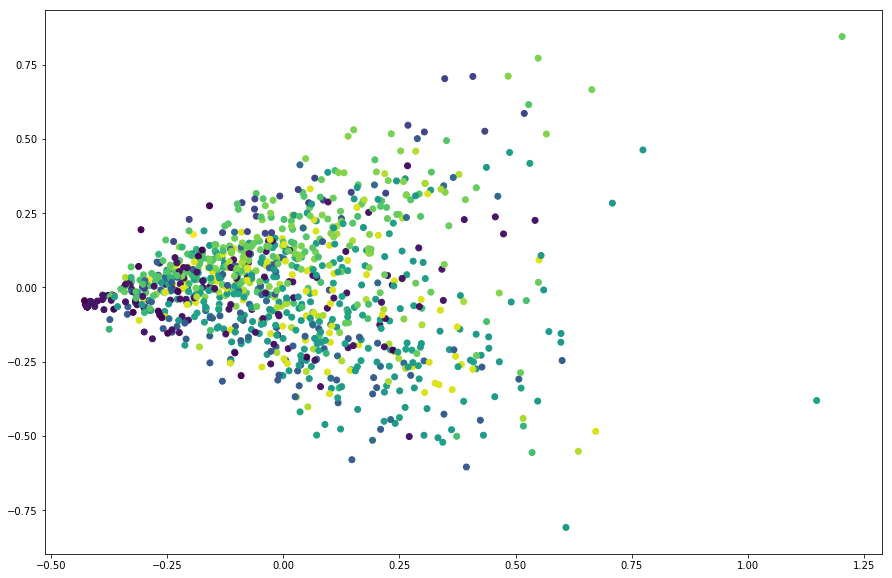

In [34]:
pca = PCA(n_components=2)
x2d = pca.fit_transform(similarities)

plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(x2d[:, 0], x2d[:, 1], c=predictions_sfla)

[ 47  53 200 288 338 536 542 567 572 660 702 731 766 791 811 864 881 940
 945 996]
[[-0.29958515 -0.06870576]
 [-0.25552936 -0.09682844]
 [-0.30595734  0.19419982]
 [-0.09071089 -0.2974481 ]
 [-0.26870104 -0.08012648]
 [ 0.23620676 -0.21172109]
 [-0.24851015 -0.15445845]
 [-0.36451205 -0.07362501]
 [ 0.05036967 -0.23488366]
 [-0.32292301 -0.08431422]
 [-0.26574945 -0.09299688]
 [-0.15863106  0.27476677]
 [-0.18263571  0.10511464]
 [-0.31117862  0.07038657]
 [-0.17432158  0.12572943]
 [-0.26102261 -0.10196545]
 [-0.31765717 -0.04499946]
 [-0.10396775 -0.22052033]
 [-0.2263866  -0.01412916]
 [-0.42746654 -0.04483271]]


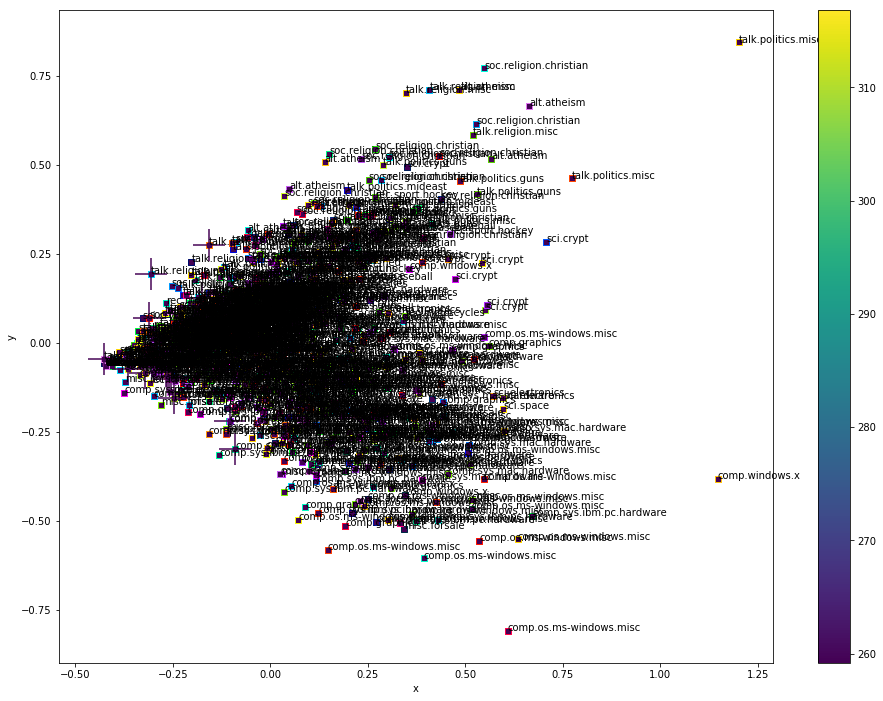

In [35]:
predictions=Px
predictions = np.array(predictions[0])
centers = np.where(predictions==-1)[0]
print(centers)
pca = PCA(n_components=2)
pca_similarity = pca.fit_transform(similarities)
 
#print(pca_similarity.shape)
#print(pca_similarity)
pca_similarity_centers = pca_similarity[centers]
#pca_features_centers = pca_fetures[centers]
print(pca_similarity_centers)
#pca_similarity_centers = pca_similarity[centers]
#pca_features_centers = pca_fetures[centers]
#import numpy as np
#import matplotlib.pyplot as plt
 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
 
for index,points in enumerate(pca_similarity):
    #pts = plt.scatter(points[0], points[1], marker='s')
   
    #scatter = ax.scatter(points[0],points[1])
    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))]       
    for t,j1 in enumerate(ax.collections):
        j1.set_color(colorst[t])
         
     #   ax.legend(fontsize='small')
 
    scatter=ax.scatter(points[0],points[1], marker='s',s=30, c=predictions[index])
    ax.annotate(s=str(fileNames[index]).split("\\")[-2],xy=(points[0],points[1]))
    
     
 
for p,center in enumerate(pca_similarity_centers):
    ax.scatter(center[0],center[1],s=1000,c=predictions[index],marker='+')
     
    #ax.annotate("1")
 
#for index,fileNumber in enumerate(cluster_map.keys()):
  #  for 
 #    scatter = ax.scatter(pca_similarity[],pca_similarity[],c=px)
  #   ax.annotate(s=fileNumber,xy=(pca_similarity_centers[index][0],pca_similarity_centers[index][1]))
 
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.colorbar(scatter)
 
plt.show()
